In [1]:
import sklearn
import pandas
import numpy as np
import sys
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold

### Splitting up the test data 
* one array containing the parameters (X)
* one with the output (y)
* Used to find intial examples of (w) 
    
This will put together the expression:

\begin{align}
    min_w ||Xw-y||^2 + \alpha ||w||^2
\end{align}


In [2]:
#import csv file 
# wineQualityRed = csv.reader(open('winequality-red.csv', newline=''), delimiter=';', quotechar='"')
redDat = genfromtxt('winequality-red.csv', delimiter=';', dtype = float)[1:]
whiDat = genfromtxt('winequality-white.csv', delimiter=';', dtype = float)[1:]

# wineQualityRed = list(map(Wine, wineQualityRed[1:]))
# print(redDat[0])
# print(whiDat[0])

#seperate the output from the parameters
X = [[0 for x in range(11)] for y in range(whiDat.__len__())]
y = [0 for x in range(whiDat.__len__())]
for i in range (0, whiDat.__len__() -1):
    X[i] = whiDat[i][0:11]
    y[i] = whiDat[i][11]

### Original check to see what value results from  alpha = 0.5

In [3]:
reg = linear_model.Ridge (alpha = .5)
reg.fit (X[:4897], y[:4897]) #had to force the index because it kept going too high 
W = reg.coef_
print(W)

[-4.96191718e-02 -1.94145511e+00 -2.89646195e-02  2.58647463e-02
 -7.68993360e-01  4.79270351e-03 -8.87416733e-04 -4.69163696e-01
  1.69550103e-01  4.16308308e-01  3.63125126e-01]


### Analyse the effect of alpha on the resulting weight vector

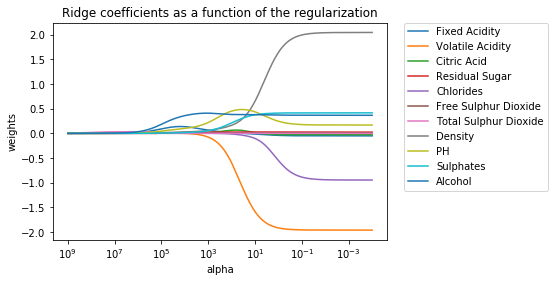

In [4]:
# Compute paths
# #############################################################################
n_alphas = 500
alphas = np.logspace(-4, 9, n_alphas)
# Array for containg the perameters 1-11
#--------0--1--2--3--4--5--6--7--8--9--10
coefs = [[],[],[],[],[],[],[],[],[],[],[]]

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit (X[:4897], y[:4897])
    for x in range(0, 11):
        coefs[x].append(ridge.coef_[x])

# #############################################################################
# Display results
ax = plt.gca()
#attatch key to each set of coeficients
plt.plot(alphas, coefs[0], label = "Fixed Acidity")
plt.plot(alphas, coefs[1], label = "Volatile Acidity")
plt.plot(alphas, coefs[2], label = "Citric Acid")
plt.plot(alphas, coefs[3], label = "Residual Sugar")
plt.plot(alphas, coefs[4], label = "Chlorides")
plt.plot(alphas, coefs[5], label = "Free Sulphur Dioxide")
plt.plot(alphas, coefs[6], label = "Total Sulphur Dioxide")
plt.plot(alphas, coefs[7], label = "Density")
plt.plot(alphas, coefs[8], label = "PH")
plt.plot(alphas, coefs[9], label = "Sulphates")
plt.plot(alphas, coefs[10], label = "Alcohol")
#--------------------------------------------#
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
#plot the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Find the most appropriate alpha using cross validation

In [5]:
 ridgeCv = linear_model.RidgeCV(alphas=alphas, fit_intercept = False)
ridgeCv.fit (X[:4897], y[:4897])
print(ridgeCv.coef_)
print(ridgeCv.alpha_)


[-4.79446860e-02 -1.94902355e+00 -2.86842970e-02  2.52427896e-02
 -8.18038547e-01  4.81951382e-03 -8.85992078e-04  1.93065621e+00
  1.89431506e-01  4.14428304e-01  3.67196408e-01]
0.22946763672319362


### Plot this to see how the weights are chosen relative to eachother 

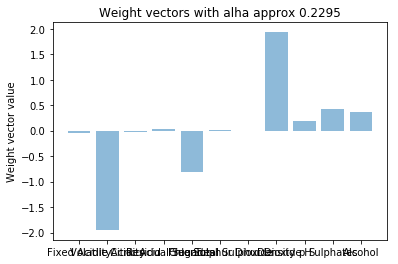

In [6]:
objects = ('Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulphur Dioxide', 'Total Sulphur Dioxide','Density','pH','Sulphates','Alcohol')
y_pos = np.arange(len(objects))
ax.set_yscale('log')
plt.bar(y_pos, ridgeCv.coef_, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Weight vector value')
plt.title('Weight vectors with alha approx 0.2295')
 
plt.show()

### split the test and training data using 10 fold 

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(whiDatX[:4897], whiDatY[:4897], test_size = 0.4, random_state = 0)

tenFold = KFold(n_splits = 10)
tenFold.get_n_splits(X)
c = 1
clfScores = []
print(tenFold)
print("TRAIN: 0 -> 4897")
print("Emmitting TEST each time")
for train_index, test_index in tenFold.split(X, y):
    print("TEST", c , ":" , test_index[0], "->", test_index[test_index.__len__()-1])
    X_train, X_test = np.delete(np.array(X), test_index, axis =0), np.delete(np.array(X), train_index, axis =0)
    y_train, y_test = np.delete(np.array(y), test_index, axis =0), np.delete(np.array(y), train_index, axis =0)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    clfScores.append(clf.score(X_test, y_test))
    c = c+1



KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: 0 -> 4897
Emmitting TEST each time
TEST 1 : 0 -> 489
TEST 2 : 490 -> 979
TEST 3 : 980 -> 1469
TEST 4 : 1470 -> 1959
TEST 5 : 1960 -> 2449
TEST 6 : 2450 -> 2939
TEST 7 : 2940 -> 3429
TEST 8 : 3430 -> 3919
TEST 9 : 3920 -> 4408
TEST 10 : 4409 -> 4897


In [9]:
print(clfScores)

[0.45510204081632655, 0.47959183673469385, 0.4816326530612245, 0.5510204081632653, 0.5183673469387755, 0.5020408163265306, 0.5, 0.5285714285714286, 0.5787321063394683, 0.5950920245398773]


```python
    # X_train, X_test, y_train, y_test = train_test_split(whiDatX[:4897], whiDatY[:4897], test_size = 0.4, random_state = 0)

tenFold = KFold(n_splits = 10)
tenFold.get_n_splits(X)
c = 1
clfScores = []
print(tenFold)
print("TRAIN: 0 -> 4897")
print("Emmitting TEST each time")
for train_index, test_index in tenFold.split(X, y):
    print("TEST", c , ":" , test_index[0], "->", test_index[test_index.__len__()-1])
    X_train, X_test = np.delete(np.array(X), test_index, axis =0), np.delete(np.array(X), train_index, axis =0)
    y_train, y_test = np.delete(np.array(y), test_index, axis =0), np.delete(np.array(y), train_index, axis =0)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    clfScores.append(clf.score(X_test, y_test))
    c = c+1

``` 

produces output 

```python

    KFold(n_splits=10, random_state=None, shuffle=False)
    TRAIN: 0 -> 4897
    Emmitting TEST each time
    TEST 1 : 0 -> 489
    TEST 2 : 490 -> 979
    TEST 3 : 980 -> 1469
    TEST 4 : 1470 -> 1959
    TEST 5 : 1960 -> 2449
    TEST 6 : 2450 -> 2939
    TEST 7 : 2940 -> 3429
    TEST 8 : 3430 -> 3919
    TEST 9 : 3920 -> 4408
    TEST 10 : 4409 -> 4897

```

```python

print(clfScores)
[0.45510204081632655, 0.47959183673469385, 0.4816326530612245, 0.5510204081632653, 0.5183673469387755, 0.5020408163265306, 0.5, 0.5285714285714286, 0.5787321063394683, 0.5950920245398773]
```

runtime approx 25 mins

In [ ]:
from sklearn.model_selection import cross_val_score
clf_1 = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf_1, X, y, cv=tenFold, n_jobs=-1)
scores

In [ ]:
#split the data 70:30

#generate predictors with all the different alphas
no_alphas = 30;
alphas = np.logspace(-4, 9, no_alphas)

#use each in cross validation 




ten_Fold = KFold(n_splits = 10)
ten_Fold.get_n_splits(X)
c = 1
regScores = []
print(ten_Fold)
print("TRAIN: 0 -> 4897")
print("Emmitting TEST each time")
for train_index, test_index in tenFold.split(X, y):
    print("TEST", c , ":" , test_index[0], "->", test_index[test_index.__len__()-1])
    X_train, X_test = np.delete(np.array(X), test_index, axis =0), np.delete(np.array(X), train_index, axis =0)
    y_train, y_test = np.delete(np.array(y), test_index, axis =0), np.delete(np.array(y), train_index, axis =0)
    regg = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    regScores.append(clf.score(X_test, y_test))
    c = c+1

